In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("/Users/furkanozdal/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")

In [38]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [39]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
polynomial_converter = PolynomialFeatures(include_bias=False)

In [67]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [43]:
poly_features = polynomial_converter.transform(X)

In [44]:
poly_features.shape

(200, 9)

In [45]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [46]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [49]:
a

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
test_predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
mean_absolute_error(y_test,test_predictions)

0.4896798044803488

In [55]:
np.sqrt(mean_squared_error(y_test,test_predictions))

0.6646431757268942

In [56]:
train_rmse_err = []
test_rmse_err = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_featuress = poly_converter.fit_transform(X)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(poly_featuress, y, test_size=0.3, random_state=101)
    model2 = LinearRegression()
    model2.fit(X_train2,y_train2)
    test_predictions2 = model2.predict(X_test2)
    train_predictions2 = model2.predict(X_train2)
    train_rmse_err.append(np.sqrt(mean_squared_error(y_train2,train_predictions2)))
    test_rmse_err.append(np.sqrt(mean_squared_error(y_test2,test_predictions2)))

In [57]:
train_rmse_err

[1.7345941243293759,
 0.5879574085292232,
 0.4339344356902067,
 0.3517083688399347,
 0.25093429451233085,
 0.1934278097421558,
 5.422368782402398,
 0.14505198696186963,
 0.16704892185716372]

In [58]:
test_rmse_err

[1.5161519375993882,
 0.6646431757268942,
 0.5803286825226185,
 0.5077742648398241,
 2.5758238588318223,
 4.382573556772669,
 1377.9931160321764,
 4894.148331028541,
 93341.68460818131]

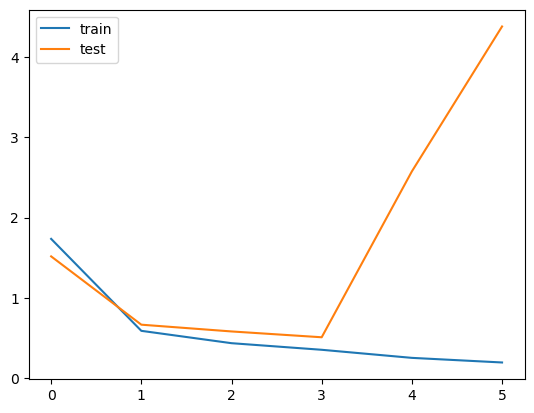

In [59]:
plt.plot(range(0,6),train_rmse_err[0:6], label="train")
plt.plot(range(0,6),test_rmse_err[0:6],label="test")
plt.legend()

In [64]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [65]:
final_model = LinearRegression()

In [66]:
fully_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(fully_converted_X,y)

LinearRegression()